In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../src/sonar_rocks_mines.csv")
df.head(5)

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
X = df.iloc[:,0:len(df.columns)-1].values
y = df.iloc[:,len(df.columns)-1].values
X

array([[0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       [0.01  , 0.0171, 0.0623, ..., 0.0044, 0.004 , 0.0117],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [4]:
import numpy as np
np.shape(X)

(207, 60)

Text(0, 0.5, 'PC2 (20.43 %)')

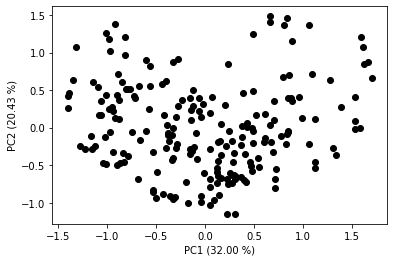

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PC = pca.fit_transform(X)
clr = {
    0:'r',
    1:'k'
}

plt.scatter(PC[:,0],PC[:,1],color="black")
plt.xlabel("PC1 (%.2f %%)" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 (%.2f %%)" % (pca.explained_variance_ratio_[1]*100))

In [6]:
dummies = pd.get_dummies(y)
y_ = dummies['M'].values

Text(0, 0.5, 'PC2 (20.43 %)')

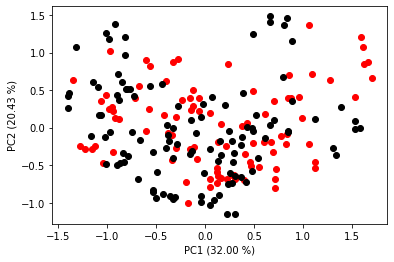

In [7]:
for i in range(0,len(y_)):
    plt.scatter(PC[i,0],PC[i,1],color=clr[y_[i]])
plt.xlabel("PC1 (%.2f %%)" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 (%.2f %%)" % (pca.explained_variance_ratio_[1]*100))

Text(0, 0.5, 'PC2 (20.43 %)')

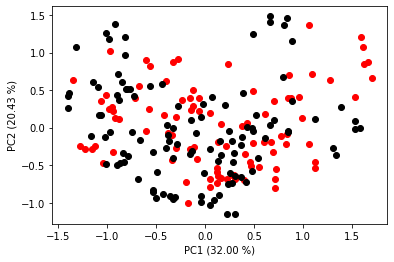

In [8]:
for i in range(0,len(y_)):
    plt.scatter(PC[i,0],PC[i,1],color=clr[y_[i]])
plt.xlabel("PC1 (%.2f %%)" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 (%.2f %%)" % (pca.explained_variance_ratio_[1]*100))

Text(0, 0.5, 'Amplitude')

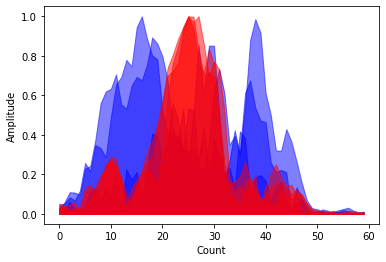

In [9]:
N = [n for n in range(0,np.size(X,1))]
plt.fill_between(N,X[0,:],alpha=0.5,color="blue")
plt.fill_between(N,X[1,:],alpha=0.5,color="blue")
plt.fill_between(N,X[2,:],alpha=0.5,color="blue")
plt.fill_between(N,X[204,:],alpha=0.5,color="red")
plt.fill_between(N,X[205,:],alpha=0.5,color="red")
plt.fill_between(N,X[206,:],alpha=0.5,color="red")
plt.xlabel("Count")
plt.ylabel("Amplitude")

plt.fill_between(N,X[0,:],alpha=0.5,color="blue")
plt.fill_between(N,X[1,:],alpha=0.5,color="blue")
plt.fill_between(N,X[2,:],alpha=0.5,color="blue")

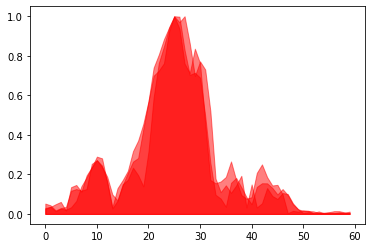

In [10]:
plt.fill_between(N,X[204,:],alpha=0.5,color="red")
plt.fill_between(N,X[205,:],alpha=0.5,color="red")
plt.fill_between(N,X[206,:],alpha=0.5,color="red")

## Support Vector Machine

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size = 0.3, random_state = 42)

model = SVC()
param_grid = [{'C': [1,10,100], 
               'kernel': ['linear','poly','rbf'],
               'gamma': ['scale','auto']
              }]
clf = GridSearchCV(model, param_grid, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
0.8966666666666667


## LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size = 0.3, random_state = 42)

model = LogisticRegression()
param_grid = [{'penalty': ['l1','l2'],
               'C':[1,10,100],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
              }]
clf = GridSearchCV(model, param_grid, cv = 5, scoring='accuracy')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7839901477832513


## Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size = 0.3, random_state = 42)

model = RandomForestClassifier()
param_grid = [{'n_estimators': [2,50,100,200],
               'criterion':['gini','entropy'],
              }]
clf = GridSearchCV(model, param_grid, cv = 5, scoring='accuracy')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'entropy', 'n_estimators': 100}
0.8113300492610838


## Feature selection

In [14]:
clf = RandomForestClassifier(n_estimators=200,criterion='gini')
clf.fit(X_train,y_train)
importance = clf.feature_importances_

In [15]:
f_arr = [f for f in range(0,len(df.columns)-1)]

<BarContainer object of 60 artists>

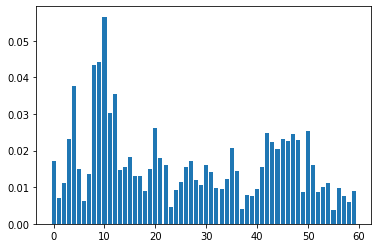

In [16]:
plt.bar(f_arr,importance)

In [17]:
set = []
for f,imp in zip(f_arr,importance):
    set.append((f,imp))
set.sort(key=lambda tup: tup[1],reverse=True)

In [18]:
keys = [set[k][0] for k in range(0,20)]
keys

[10, 9, 8, 4, 12, 11, 20, 50, 42, 47, 3, 45, 48, 46, 43, 35, 44, 15, 21, 0]

# Random Forest model with selected features

In [19]:
X = df.iloc[:,0:len(df.columns)-1].values
y = df.iloc[:,len(df.columns)-1].values
X_ = X[:,keys]

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.3, random_state = 42)

model = RandomForestClassifier()
param_grid = [{'n_estimators': [2,50,100,200],
               'criterion':['gini','entropy'],
              }]
clf = GridSearchCV(model, param_grid, cv = 5, scoring='accuracy')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'entropy', 'n_estimators': 100}
0.8182266009852217


## Support Vector Machine with selected features

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.3, random_state = 42)

model = SVC()
param_grid = [{'C': [1,10,100], 
               'kernel': ['linear','poly','rbf'],
               'gamma': ['scale','auto']
              }]
clf = GridSearchCV(model, param_grid, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.8214285714285714
